# Гора Кирилл Алексеевич
## Лабораторная работа № 2. Методы классификации данных
### Цель лабораторной работы – получение навыков работы с методами классификации.
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Кодировка классификаторов:

* 1 – классификатор K ближайших соседей (задаётся количество ближайших объектов);
* 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
* 3 – линейный классификатор (персептрон);
* 4 – логический классификатор (бинарное решающее дерево).

### Вариант 5
#### Набор данных 3 "zoo"
#### Классификаторы 1, 4


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
%matplotlib inline

In [2]:
zoo_data = pd.read_csv("zoo.csv")
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo_data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

0. animal_name -  Имя животного
0. hair - Есть ли шерсть
0. feathers - Есть ли перья
0. eggs - яйца (как тип размножения)
0. milk - дает ли молоко
0. airborne - умеет ли летать животное
0. aquatic -  животные, которые живут в воде
0. predator - животное хищник?
0. toothed - есть ли зубы у животного
0. backbone - есть ли позвоночник у животного
0. breathes - дышит ли животное (воздухом)?
0. venomous - ядовитое ли животное?
0. fins - есть ли ребра?
0. legs - сколько ног
0. tail - есть ли хвост?
0. domestic - домашнее ли животное
0. catsize - больше кота?
0. class_type - тип класса

#### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [4]:
print("До удаление дубликатов: %d" % len(zoo_data))

До удаление дубликатов: 101


In [5]:
zoo_data.drop_duplicates(keep='first', inplace = True)

In [6]:
print("После удаление дубликатов: %d" % len(zoo_data))

После удаление дубликатов: 101


#### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

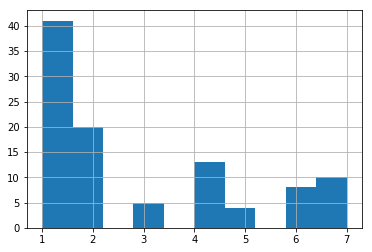

In [7]:
zoo_data.class_type.hist()
#по данной гистограмме видно, что больше всего животных в 1 и 2-ом классе

#### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [8]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


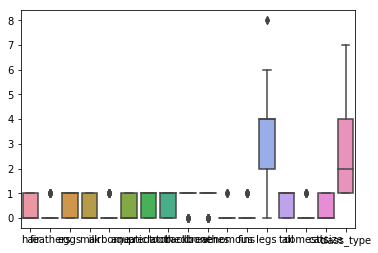

In [9]:
categorical_columns = [column for column in zoo_data.columns if zoo_data[column].dtype.name == 'object']
numerical_columns   = [column for column in zoo_data.columns if zoo_data[column].dtype.name != 'object']
sns.boxplot(data = zoo_data[numerical_columns])

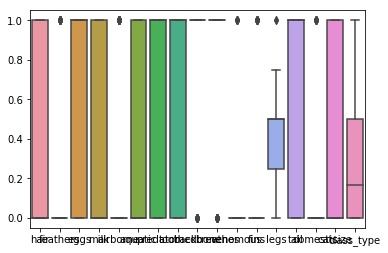

In [10]:
zoo_data[numerical_columns] = preprocessing.MinMaxScaler().fit_transform(zoo_data[numerical_columns].values.astype(float))#Масштабируем нормализацией 
sns.boxplot(data = zoo_data[numerical_columns])

#### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [11]:
print (f"Категориальные признаки: {categorical_columns}")
print (f"Числовые признаки: {numerical_columns}")

Категориальные признаки: ['animal_name']
Числовые признаки: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


In [12]:
print('Количество категориальлных признаков:', len(categorical_columns))

Количество категориальлных признаков: 1


#### количество категориальных признаков = 1, они ничего не решают, поэтому удалим их

In [13]:
zoo_data = zoo_data.drop('animal_name', axis=1)
zoo_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500,0.0,0.0,1.0,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0,0.000000
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.000,1.0,0.0,0.0,0.500000
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500,0.0,0.0,1.0,0.000000
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0,0.000000
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0,0.000000
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,1.0,1.0,0.000000
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000,1.0,1.0,0.0,0.500000
8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.000,1.0,0.0,0.0,0.500000
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,0.0,1.0,0.0,0.000000


#### 6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

                hair  feathers      eggs      milk  airborne   aquatic  \
hair        1.000000 -0.427851 -0.817382  0.878503 -0.198431 -0.473554   
feathers   -0.427851  1.000000  0.419248 -0.410761  0.656553 -0.058552   
eggs       -0.817382  0.419248  1.000000 -0.938848  0.376646  0.376244   
milk        0.878503 -0.410761 -0.938848  1.000000 -0.366765 -0.362613   
airborne   -0.198431  0.656553  0.376646 -0.366765  1.000000 -0.172638   
aquatic    -0.473554 -0.058552  0.376244 -0.362613 -0.172638  1.000000   
predator   -0.154769 -0.104430  0.011605 -0.029721 -0.295181  0.375978   
toothed     0.492531 -0.613631 -0.642150  0.628168 -0.594311  0.053150   
backbone    0.191681  0.231403 -0.340420  0.384958 -0.104718  0.022463   
breathes    0.441149  0.254588 -0.382777  0.423527  0.286039 -0.637506   
venomous   -0.104245 -0.145739  0.098689 -0.242449  0.008528  0.087915   
fins       -0.280313 -0.223541  0.164796 -0.156328 -0.251157  0.604492   
legs        0.394009 -0.206686 -0.2249

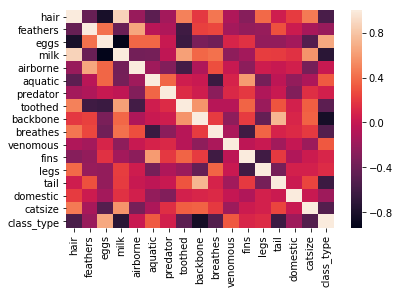

In [14]:
corr_matrix = zoo_data.corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

### 7.	Заполните пропущенные значения в данных;

In [15]:
zoo_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 17 columns):
hair          101 non-null float64
feathers      101 non-null float64
eggs          101 non-null float64
milk          101 non-null float64
airborne      101 non-null float64
aquatic       101 non-null float64
predator      101 non-null float64
toothed       101 non-null float64
backbone      101 non-null float64
breathes      101 non-null float64
venomous      101 non-null float64
fins          101 non-null float64
legs          101 non-null float64
tail          101 non-null float64
domestic      101 non-null float64
catsize       101 non-null float64
class_type    101 non-null float64
dtypes: float64(17)
memory usage: 14.2 KB


Пропущенных данных нет

### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.¶

In [16]:
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,0.0


In [42]:
data_X, data_Y = zoo_data.drop('predator', axis=1).values, zoo_data['predator']
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3, random_state = 0)

##### классификатор K ближайших соседей (задаётся количество ближайших объектов);

In [43]:
knn = KNeighborsClassifier()

search = GridSearchCV(knn, {'n_neighbors': [x for x in range(1, 47)]})
search.fit(train_x, train_y)

n = search.best_estimator_.n_neighbors
best = search.best_score_

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
print("accuracy:", accuracy_score(test_y, knn_predict))
print('best:', best)

accuracy: 0.58064516129
best: 0.7


##### логический классификатор (бинарное решающее дерево).

In [44]:
dtc = DecisionTreeClassifier()

dtc_grid = GridSearchCV(dtc, {'max_depth': list(range(1, 5)), 'max_features': list(range(1, 5))})
dtc_grid.fit (train_x, train_y)
best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_

print('best score:', best_score, 
      ', features number:', best_features,
      ', depth:', best_depth)
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(train_x, train_y)
best_score = np.mean(test_y == dtc.predict(test_x))
print('test score:', best_score)

best score: 0.6 , features number: 4 , depth: 4
test score: 0.612903225806


#### графики

In [45]:
test_y_inversion = [1-y for y in test_y]

prob_knc = knc.predict_proba(test_x)

prob_dtc = dtc.predict_proba(test_x)

pr

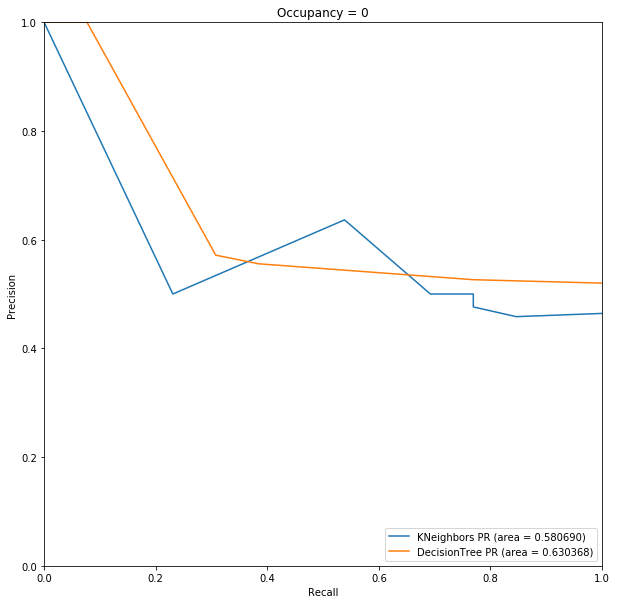

In [46]:
def PR(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))
plt.figure(figsize=(10,10))
PR(prob_knc, 0, 'KNeighbors', test_y_inversion)
PR(prob_dtc, 0, 'DecisionTree', test_y_inversion)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

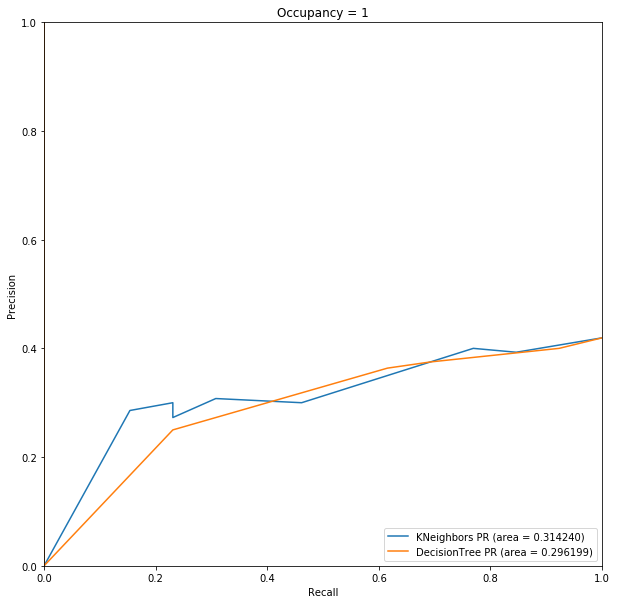

In [47]:
plt.figure(figsize=(10,10))
PR(prob_knc, 1, 'KNeighbors', test_y_inversion)
PR(prob_dtc, 1, 'DecisionTree', test_y_inversion)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

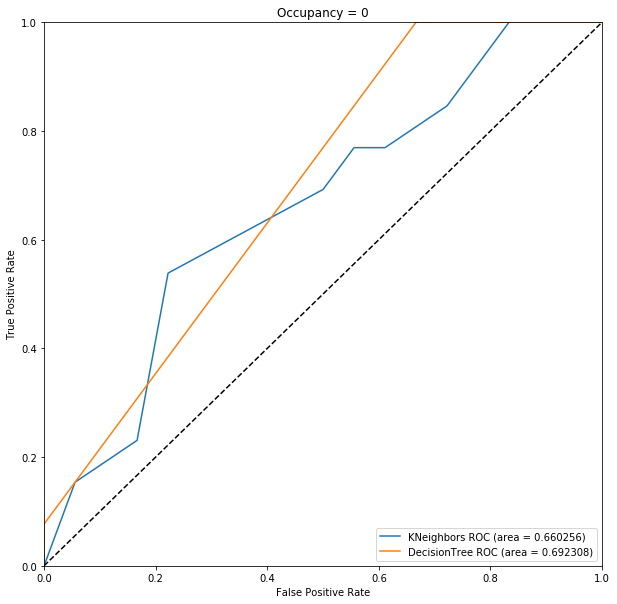

In [48]:
def ROC(prob, occupancy, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, occupancy])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

plt.figure(figsize=(10,10))

ROC(prob_knc, 0, 'KNeighbors', test_y)
ROC(prob_dtc, 0, 'DecisionTree', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()


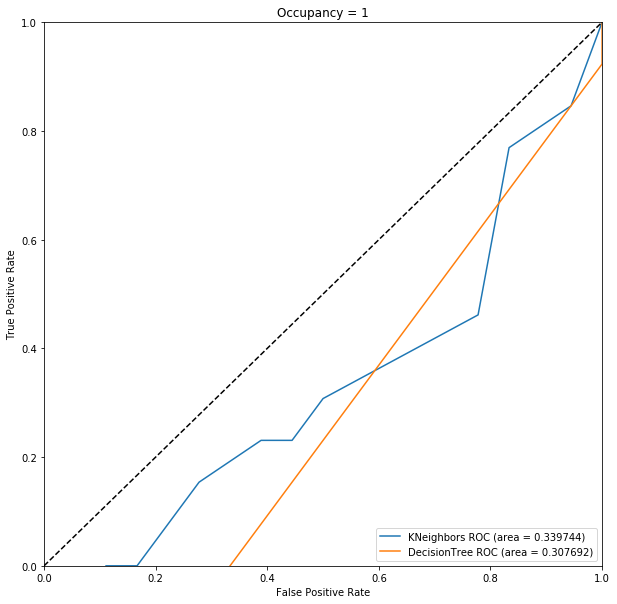

In [49]:

plt.figure(figsize=(10,10))

ROC(prob_knc, 1, 'KNeighbors', test_y)
ROC(prob_dtc, 1, 'DecisionTree', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()

### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Лучший результат для данной задачи показал логический классификатор